In [2]:
!pip install seaborn --user

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
# NOTE

In [4]:
# Set visualization theme
sns.set()

In [5]:
data_set = pd.read_csv(r"C:\Users\TestimOni\OneDrive - Ulster University\Desktop\OptimumJewelryPricing\Data\Jewelry_Dataset.csv")
# df = pd.read_csv(r"C:\Users\TestimOni\OneDrive - Ulster University\Desktop\OptimumJewelryPricing\Data\Jewelry_Dataset.csv")

In [6]:
data_set.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [7]:
type(data_set)

pandas.core.frame.DataFrame

In [8]:
data_set.shape

(95910, 13)

In [9]:
# Set the columns for the data (df) for better readability using the provided dictionary
data_set.columns = [
    "Order_DateTime",
    "Order_ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category_Alias",
    "Brand_ID",
    "Price_in_USD",
    "User_ID",
    "Product_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem"]

In [10]:
data_set.head()

,Order_DateTime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category_Alias,Brand_ID,Price_in_USD,User_ID,Product_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [11]:
data_set.shape

(95910, 13)

In [12]:
# check for and count missing values
data_set.isnull().sum()
# data_set.isnull().value_counts()

Order_DateTime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5352
Category_Alias     9933
Brand_ID           4785
Price_in_USD       5352
User_ID            5352
Product_Gender    48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [13]:
# When exploring the data, it is good to check its FEATURE CARDINALITY
data_set.nunique()

Order_DateTime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category_Alias      218
Brand_ID           2537
Price_in_USD       3166
User_ID           31079
Product_Gender        2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [14]:
# Get a statistical summary of the data
data_set.describe()

,Order_ID,Product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_in_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [15]:
sub_data = data_set[["Product_ID", "Price_in_USD"]]
sub_data.head()

,Product_ID,Price_in_USD
0,1806829193678291446,212.14
1,1842214461889315556,54.66
2,1835566849434059453,88.90
3,1873936840742928865,417.67
4,1835566854827934449,102.27


In [16]:
type(sub_data)

pandas.core.frame.DataFrame

In [17]:
# also
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_DateTime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category_Alias  85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_in_USD    90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Product_Gender  47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [18]:
# Check duplicate values
duplicate_entries = len(data_set.loc[data_set.duplicated()])
duplicate_entries

2589

In [19]:
# Invarian features: Features with cadinality of 1
invariant_feature = data_set.nunique()[data_set.nunique() == 1].index.tolist()
# invariant_feature = data_set.nunique()[data_set.nunique() == 1].index.tolist()
invariant_feature

['SKU_Quantity']

In [20]:
# Check for label distribution
label_distribution = data_set["Price_in_USD"].skew()
label_distribution

18.95906072625981

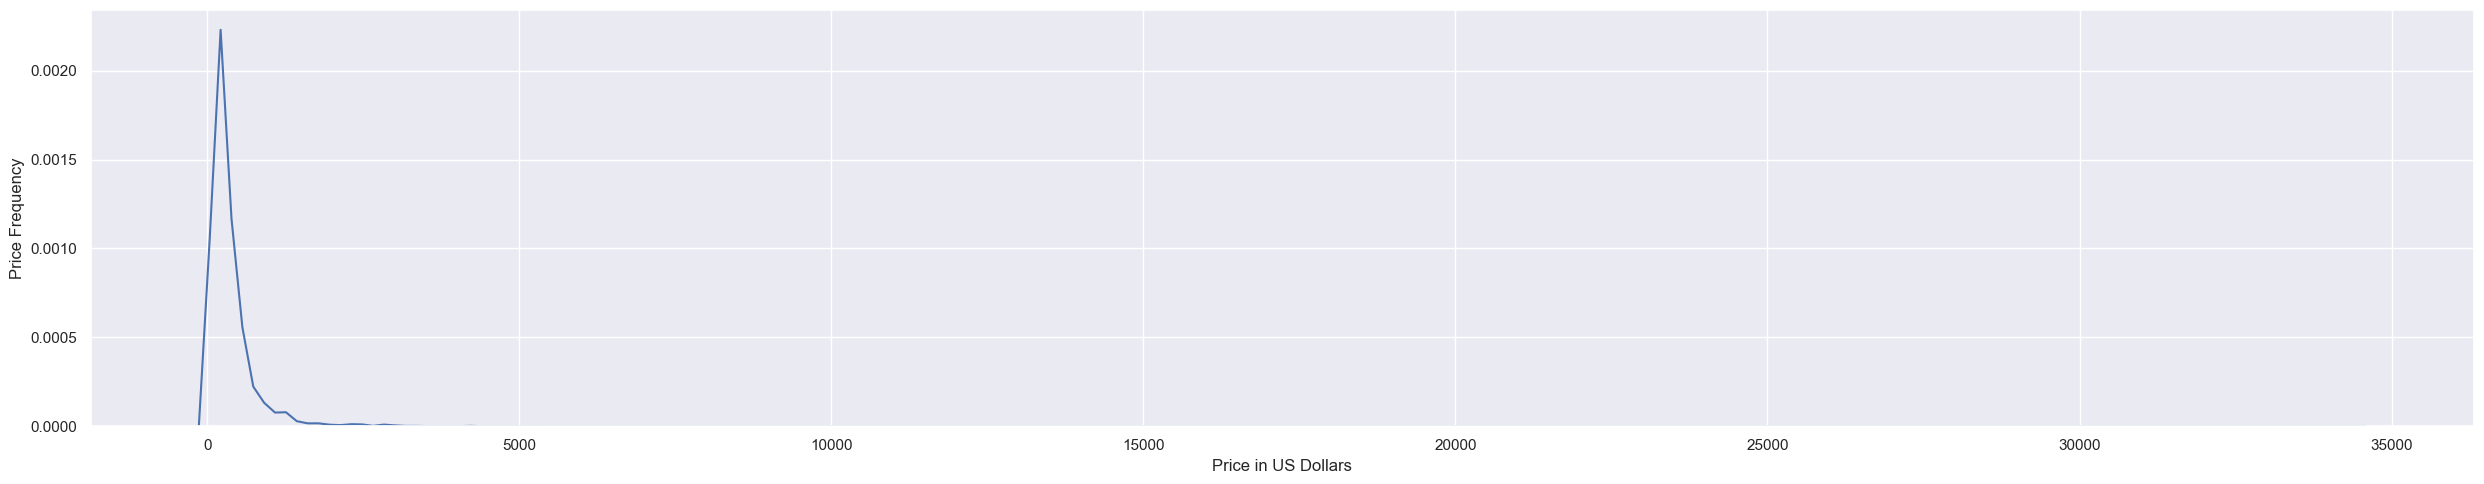

In [22]:
# The price (the major label feature) in the data has a high skew.
# Let's visualize it
plt.figure(figsize = (25, 5))
sns.kdeplot(data = data_set, x = "Price_in_USD") # Kernel Density Estimate (KDE) Plot
plt.xlabel("Price in US Dollars")
plt.ylabel("Price Frequency")
plt.tight_layout()
plt.show(); plt.close()

In [23]:
# Price kurtosis
data_set["Price_in_USD"].kurtosis()

1054.8979068506155

In [24]:
# Target gender analysis
data_set["Product_Gender"].value_counts()

f    47379
m      364
Name: Product_Gender, dtype: int64

In [25]:
# In percentage
data_set["Product_Gender"].value_counts(normalize = True)

f    0.992376
m    0.007624
Name: Product_Gender, dtype: float64

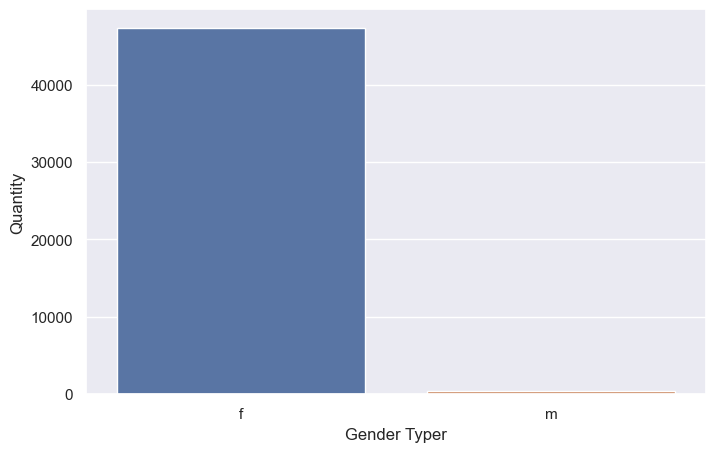

In [26]:
# Visualize gender distribution
plt.figure(figsize = (8, 5))
sns.countplot(data = data_set, x = "Product_Gender")
plt.xlabel("Gender Typer")
plt.ylabel("Quantity")
plt.show(); plt.close()

In [27]:
# Jewelry Category analysis
data_set["Category_ID"].value_counts()

1.806829e+18    29000
1.806829e+18    28286
1.806829e+18    13052
1.806829e+18     9568
1.806829e+18     6185
1.806829e+18     2356
1.806829e+18     1288
1.806829e+18      321
1.806829e+18      170
1.806829e+18      130
1.313678e+18       41
1.313678e+18       37
1.313678e+18       27
1.806829e+18       22
1.313678e+18       14
1.806829e+18       12
1.313678e+18        9
1.313678e+18        9
1.313678e+18        9
1.806829e+18        6
1.313678e+18        6
1.313678e+18        5
1.313678e+18        3
1.313678e+18        1
1.313678e+18        1
Name: Category_ID, dtype: int64

In [28]:
# Category_Alias
data_set["Category_Alias"].value_counts()

jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: Category_Alias, Length: 218, dtype: int64

In [29]:
# From the above, we need to look deeper into the data as it seems there are corrupted items in our data
data_set["Category_Alias"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [30]:
# Lets extract the actual categories
categories = data_set["Category_Alias"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [31]:
# Remove the non reasonable categories
trimed = data_set.loc[data_set["Category_Alias"].isin(categories)]
trimed.shape

(80458, 13)

In [32]:
# Percentage of the trimed to raw data
ptr = round(trimed.shape[0] * 100 /data_set.shape[0], 2)
ptr

83.89

In [33]:
# Percentage of missing values in fields of the raw data set
data_set.isnull().sum() * 100 / len(data_set)

Order_DateTime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category_Alias    10.356584
Brand_ID           4.989052
Price_in_USD       5.580231
User_ID            5.580231
Product_Gender    50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [34]:
# Let's see if the trimed data is better 
trimed.isnull().sum() * 100 / len(trimed)

Order_DateTime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category_Alias     0.000000
Brand_ID           4.309081
Price_in_USD       0.000000
User_ID            0.000000
Product_Gender    44.842029
Main_Color         2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

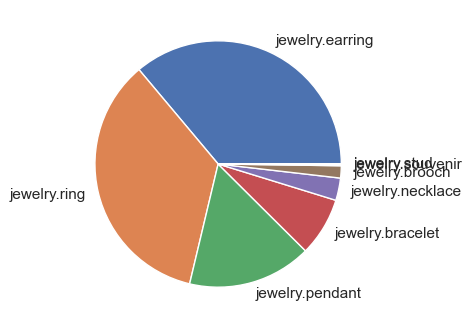

In [38]:
# Jewelry ctegory distribution visualization
subdata = trimed["Category_Alias"].value_counts()
jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()
plt.figure(figsize = (6, 4))
plt.pie(x = counts, labels = jewelry_categories)
plt.show(); plt.close()

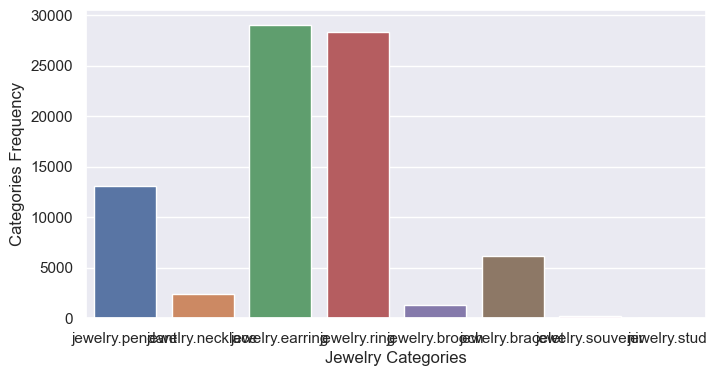

(None, <function matplotlib.pyplot.close(fig=None)>)

In [40]:
# Category count plot
plt.figure(figsize = (8, 4))
sns.countplot(data = trimed, x = "Category_Alias")
plt.xlabel("Jewelry Categories")
plt.ylabel("Categories Frequency")
plt.show(), plt.close